In [2]:
%precision 3
import numpy as np
import pandas as pd

# 

# 1차원 데이터 정리

- 평균값(기댓값), 표본분산, 불편분산(ddof=1), 표준편차
- 표본분산은 표본의 평균을 사용해서 분산을 계산한 값으로 분산을 과소 추정하는 경향이 있으며 그 경향을 없애기 위한 것이 불편분산임. 표본분산 보다 조금 큰 값이 된다.
- 표준화 : 평균값이 큰 변수와 작은 변수가 섞여 있으면 다루기 어려우므로 표준화로 데이터를 비교하기 쉽게 한다.
- 최댓값, 최솟값, 중앙값, 사분위수
- 표본분산과 비편향 분산
  - 분산은 표본 분산과 불편분산(unbiased variance)의 두 종류가 존재
  - 표본 분산은 표본에서 계산된 분산이며 모집단에 비해 표본수가 적을 때는 표본 분산이 모분산보다 작아진다.
  - 즉 표본 분산이 모집단 분산에 맞춰서 동일하게 보정한 것을 비편향 분산이라 한다.
  - 통계학에서는 이 비편향분산을 사용하는 경우가 많다.
  - 불편분산은 n대신 n-1로 나누어 구할 수 있다.

[표분분산이 분산을 과소 평가하는 이유]

- 호수안에 물고기가 7마리가 있다. 몸길이 {1,2,3,4,5,6,7}, 모평균 4, 샘플링1 3마리{1,2,3} 표본평균 2, 샘플링2 {5,6,7} 표본평균 6 
- 이때 분산은 모평균을 모르기 때문에 표본평균과의 거리를 계산하며 분산을 과소평가 하게된다.
- 표본 분산 보다 조금 더 큰 값이 되도록 보정하기 위하여 N대신 N-1로 나누어 불편분산을 구할 수 있다.



#### 과제1 교재 51p 까지 코드 풀기

In [3]:
df = pd.read_csv('./data/ch2_scores_em.csv', index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [48]:
len(df)

50

In [11]:
scores = np.array(df.english)[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [12]:
scores_df = pd.DataFrame({'score':scores}, index=pd.Index(['A','B','C','D','E','F','G','H','I','J'], name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [15]:
sum(scores)/len(scores)

55.0

In [17]:
scores_df.mean()

score    55.0
dtype: float64

In [18]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [19]:
n = len(sorted_scores)
if n%2==0:
    m0 = sorted_scores[n//2 -1]
    m1 = sorted_scores[n//2]
    median = (m0 + m1)/2
else:
    median = sorted_scores[(n+1)/2 -1]
median

56.5

In [20]:
np.median(scores)

56.5

In [22]:
scores_df.median()

score    56.5
dtype: float64

In [24]:
#최빈값
pd.Series([1,1,1,2,2,3]).mode()

0    1
dtype: int64

In [25]:
pd.Series([1,2,3,4,5]).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [26]:
mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [27]:
another_scores = [50,60,58,54,51,56,57,53,52,59]
another_mean = np.mean(another_scores)
another_deviation = another_scores - another_mean
another_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [28]:
np.mean(deviation)

0.0

In [29]:
np.mean(another_deviation)

0.0

In [30]:
summary_df = scores_df.copy()
summary_df['deviation']= deviation
summary_df

,score,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [31]:
summary_df.mean()

score        55.0
deviation     0.0
dtype: float64

In [32]:
np.mean(deviation ** 2)

86.0

In [33]:
np.var(scores)

86.0

In [36]:
#불편분산 (n-1)로 나눠서 분산 값이 더 큼 default : ddof=1 표본문산은 ddof=0
scores_df.var()

score    95.555556
dtype: float64

In [37]:
summary_df['square of devition'] = np.square(deviation)
summary_df

,score,deviation,square of devition
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [38]:
summary_df.mean()

score                 55.0
deviation              0.0
square of devition    86.0
dtype: float64

In [41]:
np.sqrt(np.var(scores, ddof=0))

9.273618495495704

In [43]:
np.max(scores) - np.min(scores)

28

In [45]:
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.0

In [46]:
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

#### 과제2 20개 원소로 구성되는 배열을 만든 후 평균, 편차 및 편차의 합을 구하세요.

In [5]:
df1 = df.english[:20]
df1
df1_mean = df1.mean()
print('평균:',df1_mean,'\n')
df1_deviation = df1-df1_mean
print('편차:',df1_deviation,'\n')
print('편차의 합:',df1_deviation.sum(),'\n')

평균: 58.15 

편차: student number
1    -16.15
2     10.85
3     -2.15
4    -17.15
5     -1.15
6    -10.15
7      6.85
8     -9.15
9      6.85
10    -0.15
11    11.85
12   -11.15
13    -7.15
14     5.85
15     3.85
16    11.85
17    12.85
18     9.85
19    14.85
20   -21.15
Name: english, dtype: float64 

편차의 합: 2.842170943040401e-14 



2.842170943040401e-14

#### 과제3 중앙값 > 평균값인 경우와 중앙값 < 평균값인 두가지 집합에서 나타나는 가능성 있는 특징을 사례로 설명하세요.

median, mean
- 중앙값 > 평균값
- 하위구간 분포도 낮고 편차가 큰값, 상위구간 분포도 높음 

ex)우리나라 인구의 평균 연령과 중간값의 관계 (0~60세의 인구 역피라미드구조)

- 중앙값 < 평균값
- 하위구간 분포도 높고, 상위구간 분포도 낮고 편차가 큰값 (피라미드구조)

ex)cakd7의 나이분포 : 박영권님과 상대적으로 어린 그 밖의 분들

In [121]:
dff = pd.read_csv('./data/연령별인구통계.csv',encoding='cp949')
dff.head()

,행정구역,2022년07월_계_총인구수,2022년07월_계_연령구간인구수,2022년07월_계_0~9세,2022년07월_계_10~19세,2022년07월_계_20~29세,2022년07월_계_30~39세,2022년07월_계_40~49세,2022년07월_계_50~59세,2022년07월_계_60~69세,...,2022년07월_여_10~19세,2022년07월_여_20~29세,2022년07월_여_30~39세,2022년07월_여_40~49세,2022년07월_여_50~59세,2022년07월_여_60~69세,2022년07월_여_70~79세,2022년07월_여_80~89세,2022년07월_여_90~99세,2022년07월_여_100세 이상
0,전국 (0000000000),"51,574,446","51,574,446","3,624,681","4,696,767","6,531,636","6,647,003","8,134,712","8,651,892","7,279,621",...,"2,274,486","3,107,663","3,207,048","4,003,613","4,276,064","3,709,836","2,074,428","1,226,295","212,088","6,975"
1,서울특별시 (1100000000),"9,493,211","9,493,211","561,651","752,130","1,411,442","1,430,515","1,468,788","1,507,446","1,291,759",...,"367,346","734,916","715,810","742,021","764,605","681,402","389,075","187,450","31,656","1,312"
2,부산광역시 (2600000000),"3,334,595","3,334,595","211,960","265,244","404,464","400,134","499,292","549,731","551,884",...,"128,804","195,316","194,735","247,326","281,379","291,836","167,539","81,932","12,503",346
3,대구광역시 (2700000000),"2,374,120","2,374,120","161,775","217,375","301,782","281,414","368,010","417,484","346,375",...,"104,622","141,612","132,976","186,247","213,155","181,427","102,501","55,358","8,258",233
4,인천광역시 (2800000000),"2,960,580","2,960,580","211,842","270,973","383,741","402,942","482,412","512,005","409,817",...,"131,743","183,731","193,836","235,172","256,189","207,192","100,335","56,045","10,554",346


In [122]:
dfff = dff.iloc[0,3:9]
dfff = pd.DataFrame(dfff)
dfff.columns=['인구']
dfff

,인구
2022년07월_계_0~9세,"3,624,681"
2022년07월_계_10~19세,"4,696,767"
2022년07월_계_20~29세,"6,531,636"
2022년07월_계_30~39세,"6,647,003"
2022년07월_계_40~49세,"8,134,712"
2022년07월_계_50~59세,"8,651,892"


In [126]:
import re
dfff.인구 = dfff.인구.apply(lambda x:re.sub(',','',x))
dfff.인구 = dfff.인구.astype('int')
dfff

,인구
2022년07월_계_0~9세,3624681
2022년07월_계_10~19세,4696767
2022년07월_계_20~29세,6531636
2022년07월_계_30~39세,6647003
2022년07월_계_40~49세,8134712
2022년07월_계_50~59세,8651892


<AxesSubplot:ylabel='인구'>

C:\Users\SANGYUN\anaconda3\envs\cakd7\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SANGYUN\anaconda3\envs\cakd7\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


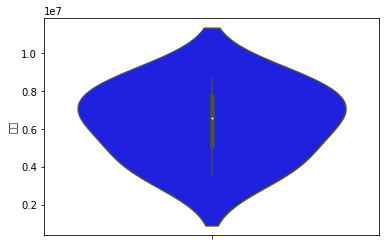

In [138]:
import seaborn as sns
sns.violinplot(y='인구', data=dfff, color='blue', )

In [128]:
dfff.describe()

,인구
count,6.000000e+00
mean,6.381115e+06
std,1.937000e+06
min,3.624681e+06
25%,5.155484e+06
50%,6.589320e+06
75%,7.762785e+06
max,8.651892e+06


In [129]:
sorted_scores = np.sort(dfff.인구)
sorted_scores
n = len(sorted_scores)
if n%2==0:
    m0 = sorted_scores[n//2 -1]
    m1 = sorted_scores[n//2]
    median= (m0 + m1)/2
else:
    median = sorted_scores[(n+1)/2 -1]
median

6589319.5

In [131]:
#중간값 > 평균값
median>dfff.mean() 

인구    True
dtype: bool

#### 과제4 4분위를 이용하여 이상치를 구하는 사례를 생성하고 시각화 및 이상치를 산술하는 과정을 설명하세요.

In [58]:
df.describe()

,english,mathematics
count,50.000000,50.000000
mean,58.380000,78.880000
std,9.799813,8.414371
min,37.000000,57.000000
25%,54.000000,76.000000
50%,57.500000,80.000000
75%,65.000000,84.000000
max,79.000000,94.000000


In [61]:
df.english.var()

96.036

<AxesSubplot:>

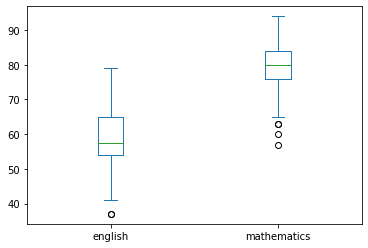

In [60]:
df.plot(kind='box')
# 일반 분포에서는 Q3 + 1.5IQR , Q1- 1.5IQR
# 정규분포로 따지면 평균값에서 2시그마 이상으로 넘어가는 값들을 이상치라고 봄


In [ ]:
Q1 = np.percentile(df, 25)
Q3 = np.percentile(df, 75)
IQR = Q3 - Q1
IQR

In [80]:
sorted_scores = np.sort(df.english)
sorted_scores
n = len(sorted_scores)
if n%2==0:
    m0 = sorted_scores[n//2 -1]
    m1 = sorted_scores[n//2]
    median_e = (m0 + m1)/2
else:
    median_e = sorted_scores[(n+1)/2 -1]
median_e

57.5

In [81]:
df[df.english<(median_e-2*df.english.std())]

,english,mathematics
student number,,
20,37,70
35,37,57


In [82]:
sorted_scores = np.sort(df.mathematics)
sorted_scores
n = len(sorted_scores)
if n%2==0:
    m0 = sorted_scores[n//2 -1]
    m1 = sorted_scores[n//2]
    median_m = (m0 + m1)/2
else:
    median_m = sorted_scores[(n+1)/2 -1]
median_m

80.0

In [84]:
df[df.mathematics<(median_m-2*df.mathematics.std())]

,english,mathematics
student number,,
3,56,63
4,41,63
6,48,60
35,37,57


결론 : 35번 학생은 공부를 안한다.

#### 과제5 표본분산과 불편분산의 차이를 사례를 들어 설명하세요.

In [ ]:
표본분산은 특정 표본의 분산, 표본이 모집단보다 작다면 모분산보다 작은값
불편분산은 표본분산 값을 n 대신 n-1로 나누어 더 큰 값으로 보정해준 것
why n-1 ?
표본분산 : 과소추정함
자유도 ? 모집단의 정보를 주는 독립적인 표본 수
n개의 표본평균의 기댓값은 모평균으로 정해지기 때문에 
표본들의 자유도는 n-1로 축소 됨
모분산은 표본분산의 기댓값/(n-1)


In [6]:
# 0823
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('./data/ch2_scores_em.csv')

In [8]:
scores = np.array(df.english)[:10]

In [18]:
scores_df = pd.DataFrame({'score':scores}, index=pd.Index(['A','B','C','D','E','F','G','H','I','J'], name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [21]:
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

In [22]:
np.mean(z), np.std(z, ddof=0)

(-0.000, 1.000)

In [23]:
# 평균이 50 표준편차가 10이 되도록 정규화함.
z = 50 + 10*z
scores_df['deviation_value'] = z
scores_df

,score,deviation_value
student,,
A,42,35.981739
B,69,65.096588
C,56,51.078328
D,41,34.903412
E,57,52.156655
F,48,42.451706
G,65,60.783277
H,49,43.530034
I,65,60.783277


In [ ]:
IQR = Q3-Q1
upper whisker(최대값) : Q3 + 1.5IQR 보다 작은 수 중에서 가장 큰 값?
lower whisker(최소값) : Q1 - 1.5IQR 보다 큰 수 중에서 가장 작은 값?
이상값의 정의는 whisker밖의 값
whisker는 특정 존재 값이 아니고 수치임 

정규분포에서의 이상값
중앙값= 평균값의 2시그마 밖의 값

### Box plot 의미 해석

* IQR(Inter Quartile Range): 제 3사분위수 - 제1사분위수
* lower whisker: Q1 - 1.5 x IQR 이내인 값중에서 최솟값
* upper whisker: Q3 + 1.5 x IQR 이내인 값중에서 최댓값
* 이상치: lower whisker, upper whisker를 벗어나는 값


#### 과제1  0823 
p52~p83 예제 코드

In [44]:
# 1차원 데이터 시각화

english_scores = np.array(df['english'])
pd.Series(english_scores). describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [94]:
np.histogram(english_scores)

(array([ 3,  3,  4,  2, 13,  6, 10,  5,  2,  2], dtype=int64),
 array([37. , 41.2, 45.4, 49.6, 53.8, 58. , 62.2, 66.4, 70.6, 74.8, 79. ]))

In [45]:
freq, _ =np.histogram(english_scores, bins=10, range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [46]:
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]
freq_dist_df = pd.DataFrame({'frequency':freq}, pd.Index(freq_class, name = 'class'))
              
              
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [47]:
class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [48]:
#상대도수
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [49]:
# 누적상대도수
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [50]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class value', 'frequency', 'relative frequency', 'cumulative relative frequency']]
freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


In [52]:
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(),'class value'] # frequency의 idmax()=가장 큰값의 인덱스 반환

65

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

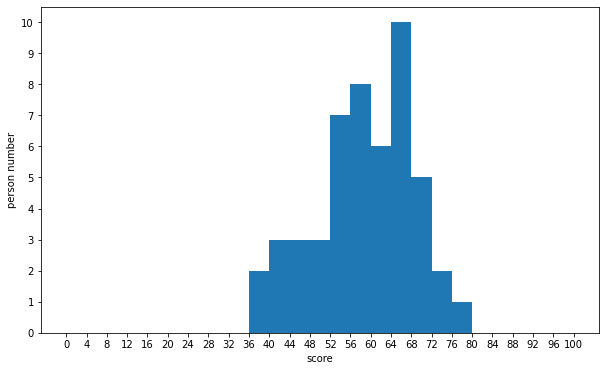

In [56]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111) # 인수를 1by1지정, 하나의 영역에 그림 (234영역지정)    (*nrows*, *ncols*, *index*)
freq, _, _ =ax.hist(english_scores, bins=25, range=(0,100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0, 100, 25+1)) # 0~ 100 까지 10+1 눈금 (열한개)
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()

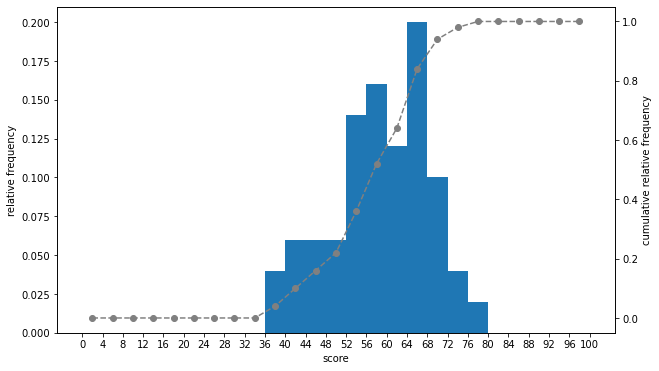

In [61]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111) # 1by1지정 하나의 영역에 그림
ax2 = ax1.twinx() # y축 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ =ax1.hist(english_scores, bins=25, range=(0,100), weights=weights)
cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0, 100, 4)]
ax2.plot(class_value, cum_rel_freq, ls='--', marker='o',color='gray')
ax2.grid(visible=False)# 눈금제거

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency')
ax1.set_xticks(np.linspace(0, 100, 25+1))

plt.show()

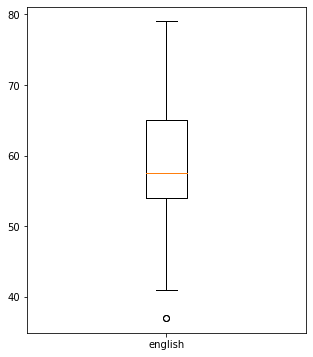

In [92]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['english'])

plt.show()

# 2차원 데이터 정리

In [64]:
df = pd.read_csv('./data/ch2_scores_em.csv', index_col='student number')


In [65]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,'mathematics':ma_scores}, index=pd.Index(['A','B','C','D','E','F','G','H','I','J'], name='student'))

scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [68]:
summary_df = scores_df.copy()
summary_df['english_deviation'] = summary_df['english']-summary_df['english'].mean()
summary_df['mathematics_deviation']= summary_df['mathematics']-summary_df['mathematics'].mean()
summary_df['product of deviations'] = summary_df['english_deviation']*summary_df['mathematics_deviation']
summary_df


,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [69]:
summary_df['product of deviations'].mean()

62.800

In [71]:
cov_mat = np.cov(en_scores,ma_scores,ddof=0) # 공분산
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [78]:
cov_mat[0,1], cov_mat[1,0]

(62.800, 62.800)

In [79]:
cov_mat[0,0], cov_mat[1,1]

(86.000, 68.440)

In [81]:
np.var(en_scores, ddof=0),np.var(ma_scores, ddof=0)

(86.000, 68.440)

In [82]:
np.cov(en_scores, ma_scores, ddof=0)[0,1]/(np.std(en_scores)*np.std(ma_scores)) # 공분산을 각각표준편차로 나눠줌

0.819

In [84]:
np.corrcoef(en_scores, ma_scores)  # 상관계수

array([[1.        , 0.81856923],
       [0.81856923, 1.        ]])

In [86]:
scores_df.corr() # 데이터프레임은 corr()로 바로 나옴

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


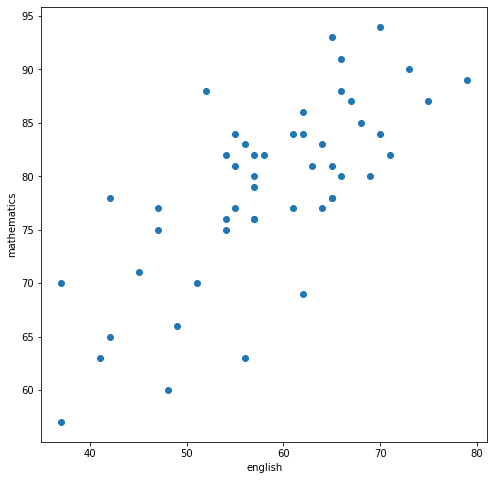

In [87]:
english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()

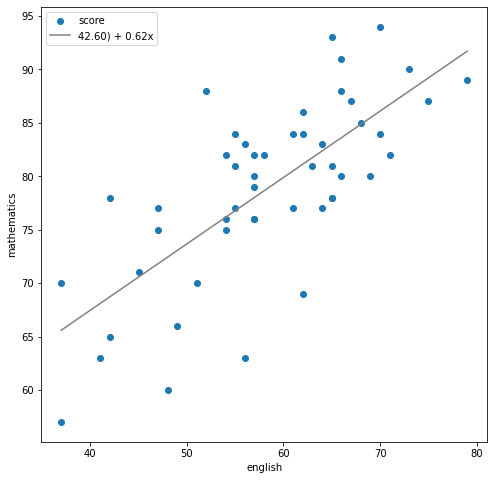

In [89]:
poly_fit = np.polyfit(english_scores, math_scores, 1)

poly_1d = np.poly1d(poly_fit)
xs = np.linspace(english_scores.min(), english_scores.max())
ys = poly_1d(xs)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
ax.scatter(english_scores, math_scores, label='score')
ax.plot(xs,ys, color='gray', label=f'{poly_fit[1]:.2f}) + {poly_fit[0]:.2f}x')
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.legend(loc='upper left')

plt.show()

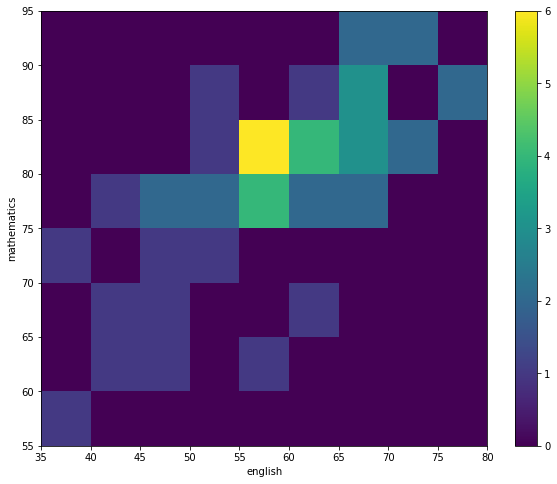

In [90]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores, bins=[9,8], range=[(35,80),(55,95)])
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3], ax=ax)
plt.show()

#### 과제2 0823 일차원 데이터를 생성하여 다음을 수행하세요
도수분포표를 만들고 히스토그램으로 시각화하세요(계급(bins)을 변경해여 2개를 작성)
상대도수 및 누적상대도수를 도수분포표에 추가하고 히스토그램과 누적상대도수를 시각화하세요

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv('./data/stock_valuation.csv',encoding='cp949')
df.head()

,id,name,eps,bps,per,pbr
0,130960,CJ E&M,6301.333333,54068,15.695091,1.829178
1,136480,하림,274.166667,3551,11.489362,0.887074
2,138040,메리츠금융지주,2122.333333,14894,6.313806,0.899691
3,139480,이마트,18268.166670,295780,13.931338,0.860437
4,145990,삼양사,5741.000000,108090,14.283226,0.758627


In [77]:
dff = df.iloc[:,4]
dff = pd.DataFrame(dff)
dff.columns=['per']
dff

,per
0,15.695091
1,11.489362
2,6.313806
3,13.931338
4,14.283226
5,7.453306
6,30.755864
7,25.185866
8,40.802348
9,89.790059


In [78]:
m = np.array(dff['per'])

In [79]:
freq, _ = np.histogram(m, bins=10, range=(0,100))
freq

array([2, 4, 1, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

In [80]:
freq_class = [f'{i}~{(i+10)}' for i in range(0,100,10)]
freq_dist_df = pd.DataFrame({'frequency':freq}, index=pd.Index(freq_class, name='class'))
freq_dist_df

,frequency
class,
0~10,2
10~20,4
20~30,1
30~40,1
40~50,1
50~60,0
60~70,0
70~80,0
80~90,1


In [81]:
class_value = [(i+((i+1)))//2 for i in range(0,100,10)]
class_value

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

In [82]:
rel_freq = freq / freq.sum()
rel_freq#상대도수

array([0.2, 0.4, 0.1, 0.1, 0.1, 0. , 0. , 0. , 0.1, 0. ])

In [83]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq#누적상대도수

array([0.2, 0.6, 0.7, 0.8, 0.9, 0.9, 0.9, 0.9, 1. , 1. ])

In [84]:
freq_dist_df['class value']=class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class value','frequency','relative frequency','cumulative relative frequency']]
freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,0,2,0.2,0.2
10~20,10,4,0.4,0.6
20~30,20,1,0.1,0.7
30~40,30,1,0.1,0.8
40~50,40,1,0.1,0.9
50~60,50,0,0.0,0.9
60~70,60,0,0.0,0.9
70~80,70,0,0.0,0.9
80~90,80,1,0.1,1.0


In [85]:
#최빈값
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value']

10

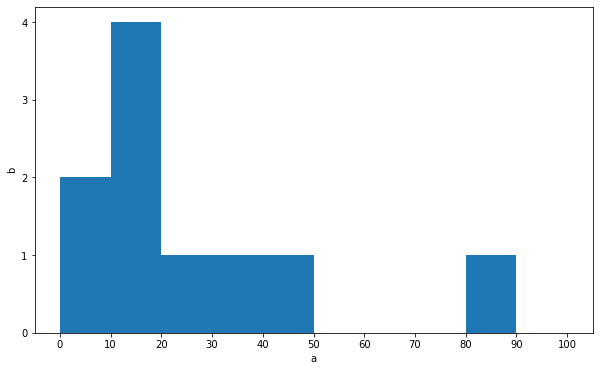

In [98]:
fig = plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
freq, _, _ = ax.hist(m, bins=10, range=(0,100))
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_xticks(np.linspace(0,100,10+1))
ax.set_yticks(np.arange(0,freq.max()+1))
plt.show()

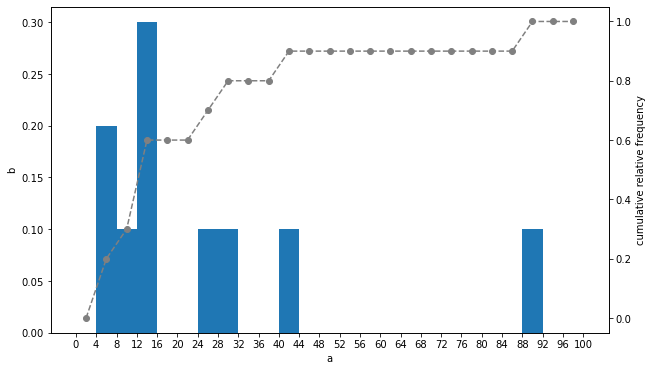

In [97]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111) # 1by1지정 하나의 영역에 그림
ax2 = ax1.twinx() # y축 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
weights = np.ones_like(m) / len(m)
rel_freq, _, _ =ax1.hist(m, bins=25, range=(0,100), weights=weights)
cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0, 100, 4)]
ax2.plot(class_value, cum_rel_freq, ls='--', marker='o',color='gray')
ax2.grid(visible=False)# 눈금제거

ax1.set_xlabel('a')
ax1.set_ylabel('b')
ax2.set_ylabel('cumulative relative frequency')
ax1.set_xticks(np.linspace(0,100,25+1))

plt.show()

#### 과제3 0823 
이차원 데이터를 생성하여 다음을 수행하세요.(데이터 수 각각 1000개 이상)

공분산 및 상관계수를 구하세요.
이차원 데이터를 산점도, 히트맵으로 시각화한 후 인사이트를 기술하세요.

In [64]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
np.random.seed(1)
a = np.random.normal(size=10000)
b = np.random.normal(size=10000)

In [66]:
a = sorted(a)
b = sorted(b, reverse=True)

In [67]:
df = pd.DataFrame(a,b)
df.reset_index(inplace=True)
df.columns = ['a','b']
df

,a,b
0,4.168118,-3.656440
1,3.834381,-3.294858
2,3.560613,-3.260615
3,3.446956,-3.253034
4,3.385715,-3.219132
...,...,...
9995,-3.280328,3.560873
9996,-3.282079,3.613277
9997,-3.310843,3.740249
9998,-3.435926,3.958603


In [68]:
df['a_deviation'] = df['a']-df['a'].mean()
df['b_deviation']= df['b']-df['b'].mean()
df['product of deviations'] = df['a_deviation']*df['b_deviation']
df


,a,b,a_deviation,b_deviation,product of deviations
0,4.168118,-3.656440,4.158682,-3.666213,-15.246614
1,3.834381,-3.294858,3.824946,-3.304631,-12.640034
2,3.560613,-3.260615,3.551177,-3.270388,-11.613727
3,3.446956,-3.253034,3.437521,-3.262807,-11.215966
4,3.385715,-3.219132,3.376280,-3.228905,-10.901686
...,...,...,...,...,...
9995,-3.280328,3.560873,-3.289763,3.551101,-11.682280
9996,-3.282079,3.613277,-3.291514,3.603504,-11.860986
9997,-3.310843,3.740249,-3.320278,3.730476,-12.386218
9998,-3.435926,3.958603,-3.445361,3.948830,-13.605146


In [69]:
cov_mat = np.cov(a,b,ddof=0) # 공분산
cov_mat

array([[ 0.99757316, -0.99980466],
       [-0.99980466,  1.00237996]])

In [73]:
#공분산
cov_mat[0,0]
cov_mat[1,1]

1.0023799607178985

In [74]:
#상관관계
cov_mat[0,1]
cov_mat[1,0]

-0.9998046639603739

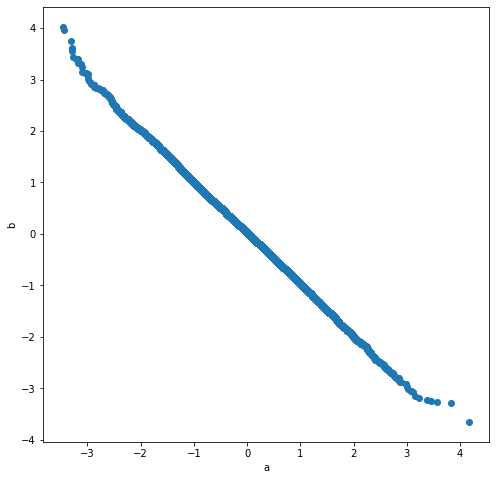

In [70]:
a_s = np.array(df['a'])
b_s = np.array(df['b'])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.scatter(a_s, b_s)
ax.set_xlabel('a')
ax.set_ylabel('b')

plt.show()

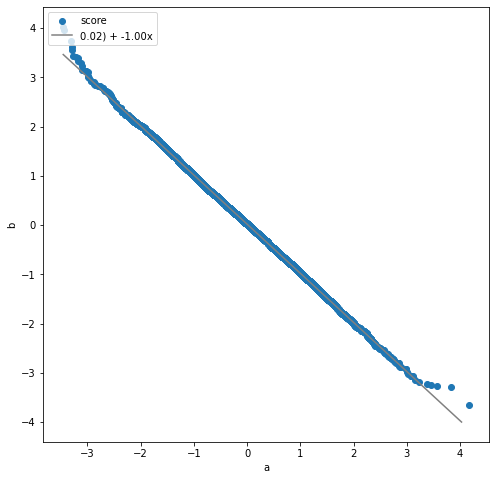

In [71]:
poly_fit = np.polyfit(a_s, b_s, 1)

poly_1d = np.poly1d(poly_fit)
xs = np.linspace(a_s.min(), b_s.max())
ys = poly_1d(xs)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
ax.scatter(a_s, b_s, label='score')
ax.plot(xs,ys, color='gray', label=f'{poly_fit[1]:.2f}) + {poly_fit[0]:.2f}x')
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.legend(loc='upper left')

plt.show()

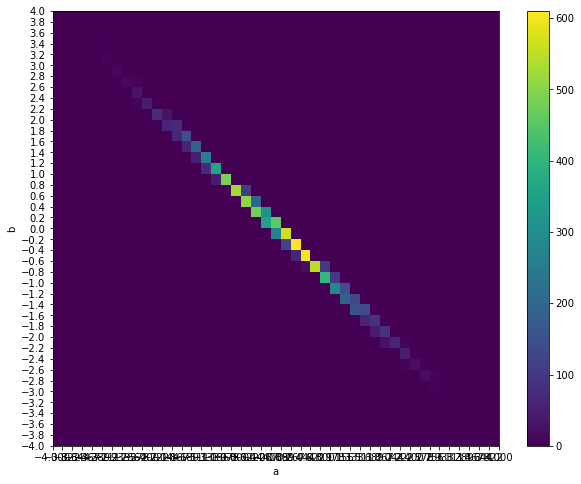

In [100]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c = ax.hist2d(a_s, b_s, bins=[45,40], range=[(-4,4),(-4,4)])
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3], ax=ax)
plt.show()

In [ ]:
y = mx + a

In [ ]:
0824

#### 과제1 0824
p84~p112

In [119]:
#넘파이 array 파일 읽기
import numpy as np
a_data = np.load('./data/ch3_anscombe.npy')
print(a_data.shape)
a_data[0] # 11행 2열 짜리가 4세트 중에 첫번째 세트

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [110]:
import pandas as pd
stats_df = pd.DataFrame(index=['X_mean','X_variance','Y_mean','Y_variance','X&Y_correlation','x&Y_regression line'])
for i, data in enumerate(a_data):
    dataX = data[:, 0]
    dataY = data[:, 1]
    poly_fit = np.polyfit(dataX, dataY, 1)
    stats_df[f'data{i+1}']=[f'{np.mean(dataX):.2f}',f'{np.var(dataX):.2f}',f'{np.mean(dataY):.2f}',f'{np.var(dataX):.2f}',
                            f'{np.corrcoef(dataX, dataY)[0,1]:.2f}',f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']
stats_df


,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,10.00,10.00,10.00,10.00
X&Y_correlation,0.82,0.82,0.82,0.82
x&Y_regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


In [111]:
import matplotlib.pyplot as plt

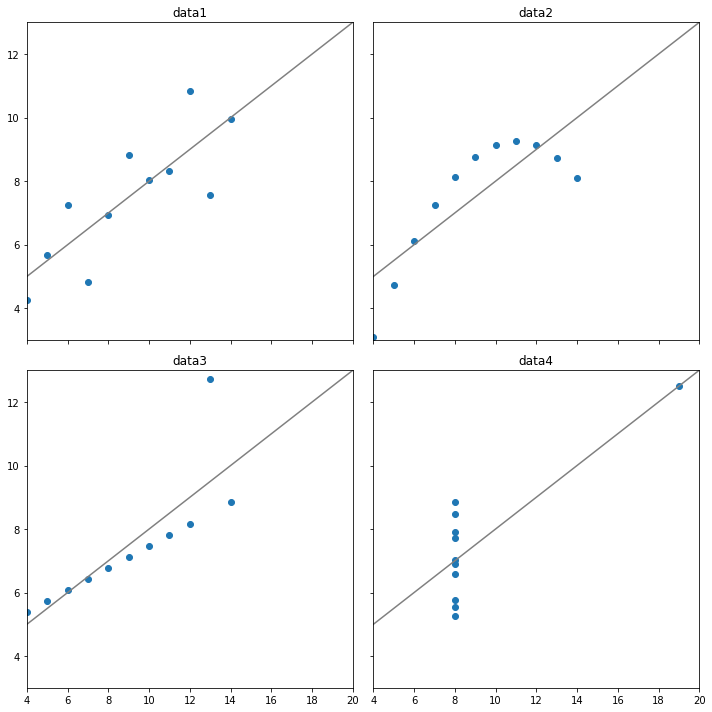

In [120]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10), sharex=True, sharey=True)
xs = np.linspace(0, 30, 100)
for i, data in enumerate(a_data):
    poly_fit = np.polyfit(data[:,0], data[:,1],1)  # , ,1 적합 다항식의 정도
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    #그리는 영역 선택
    ax = axes[i//2, i%2]
    ax.set_xlim([4,20])
    ax.set_ylim([3,13])
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0], data[:,1])
    ax.plot(xs, ys, color='gray')

plt.tight_layout()
plt.show()

#### polyfit 함수 사용법
polyfit(x,y,차수) 형태로 매우 간단하게 이용이 가능.

In [123]:
#1차
x = [1,2,3,4,5,6]
y = [1,3,6,8,11,19]

print(np.polyfit(x,y,1))
#출력 결과 
# y = 3.314x - 3.6

[ 3.31428571 -3.6       ]


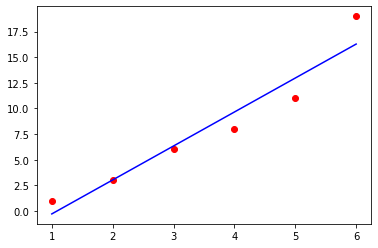

In [124]:
poly = np.polyfit(x,y,1)
y_pred = np.array(x)*poly[0] + poly[1]

plt.plot(x, y_pred, color='b')
plt.scatter(x,y, color="r")
plt.show()

In [126]:
# 2차 회귀식 및 시각화 
x = [1,2,3,4,5,6]
y = [1,3,6,8,11,19]

print(np.polyfit(x,y,2))

[ 0.53571429 -0.43571429  1.4       ]


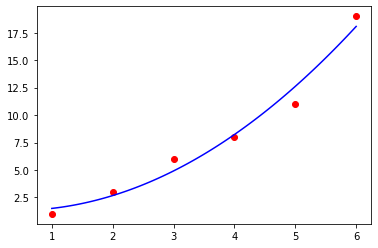

In [128]:
poly = np.polyfit(x,y,2)
x_line = np.linspace(1,6,100) # 곡선을 부드럽게 그리기 위한 linspace 객체 선언 1~6을 100개로
y_pred = (x_line**2)*poly[0] + x_line*poly[1] + poly[2]

plt.plot(x_line, y_pred, color='b')
plt.scatter(x,y, color="r")
plt.show()

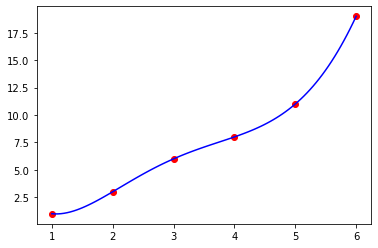

In [130]:
# 5차 
# 차수가 높아지면 과적합 됨
# 일반화가 중요한데 특정 훈련데이터에 과적합될 확률 높음
poly = np.polyfit(x,y,5)
x_line = np.linspace(1,6,100)
y_pred = np.zeros_like(x_line) # 예측값을 담을 그릇(현재 모든 값이 0)

for i in range(6):
    y_pred += x_line**(5-i)*poly[i]
plt.plot(x_line, y_pred, color='b')
plt.scatter(x,y,color='r')
plt.show()

In [132]:
df  = pd.read_csv('./data/ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

In [134]:
# np.random.choice([1,2,3],3) #복원추출
np.random.choice([1,2,3],3, replace=False) #비복원추출
#난수고정
np.random.seed(1)
np.random.choice([1,2,3],3)

array([3, 2, 1])

In [136]:
np.random.seed(1)
sample = np.random.choice(scores, 20)
sample.mean()

68.3

In [137]:
scores.mean()

69.53

In [138]:
for i in range(5):
    sample = np.random.choice(scores, 20)
    print(f'{i+1}번째 무작위 추출로 얻은 표본평균', sample.mean())

1번째 무작위 추출로 얻은 표본평균 74.4
2번째 무작위 추출로 얻은 표본평균 74.65
3번째 무작위 추출로 얻은 표본평균 70.95
4번째 무작위 추출로 얻은 표본평균 71.15
5번째 무작위 추출로 얻은 표본평균 70.1


In [139]:
dice = [1,2,3,4,5,6]
prob = [1/21,2/21,3/21,4/21,5/21,6/21]

In [142]:
np.random.choice(dice,p=prob)# p인수는 확률값 지정
# np.random.choice(dice,p=[1,0,0,0,0,0]) #무조건 1만 나옴

5

In [143]:
num_trial = 100
sample = np.random.choice(dice, num_trial, p=prob)
sample

array([2, 5, 5, 4, 6, 4, 6, 6, 1, 5, 2, 6, 2, 4, 6, 4, 6, 6, 4, 6, 3, 5,
       1, 5, 4, 6, 4, 3, 6, 5, 2, 4, 6, 3, 4, 3, 5, 3, 2, 5, 3, 4, 2, 5,
       2, 4, 3, 6, 3, 3, 2, 5, 4, 4, 6, 4, 6, 5, 4, 6, 4, 4, 4, 3, 6, 6,
       6, 5, 1, 5, 2, 4, 4, 3, 2, 3, 3, 6, 4, 2, 6, 4, 3, 6, 6, 6, 5, 1,
       6, 6, 4, 5, 2, 3, 5, 3, 6, 4, 2, 6])

In [144]:
freq, _ = np.histogram(sample, bins=6, range=(1,7))
pd.DataFrame({'frequency':freq,'relative frequency':freq/num_trial}, index = pd.Index(np.arange(1,7), name='dice'))

,frequency,relative frequency
dice,,
1,4,0.04
2,13,0.13
3,16,0.16
4,24,0.24
5,16,0.16
6,27,0.27


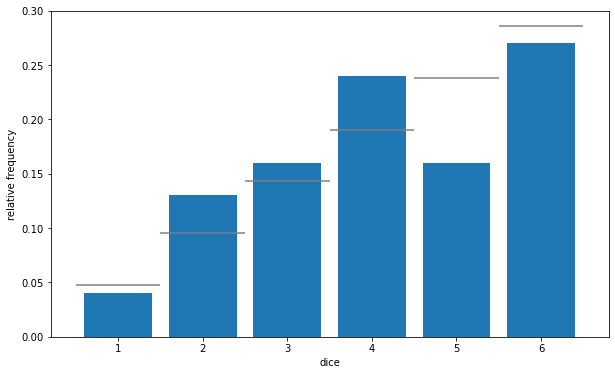

In [148]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
ax.hlines(prob, np.arange(1,7), np.arange(2,8), colors='gray')
ax.set_xticks(np.linspace(1.5,6.5,6))
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

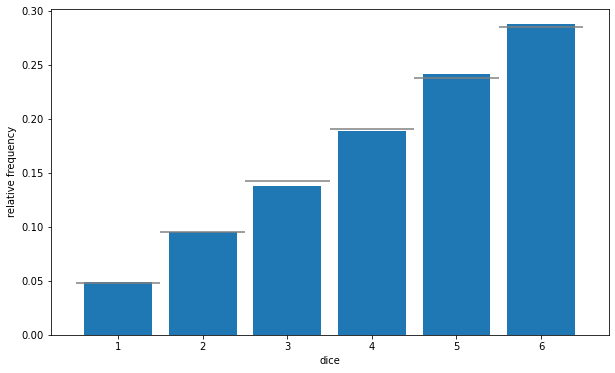

In [151]:
num_trial=10000
sample= np.random.choice(dice, size=num_trial, p=prob)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
ax.hlines(prob, np.arange(1,7), np.arange(2,8), colors='gray')
ax.set_xticks(np.linspace(1.5,6.5,6))
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

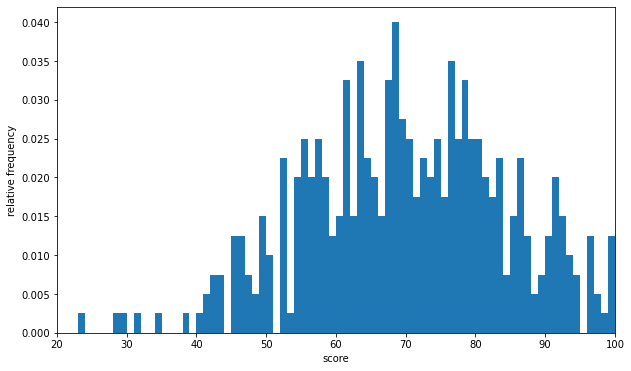

In [152]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0,100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

In [153]:
np.random.choice(scores)

63

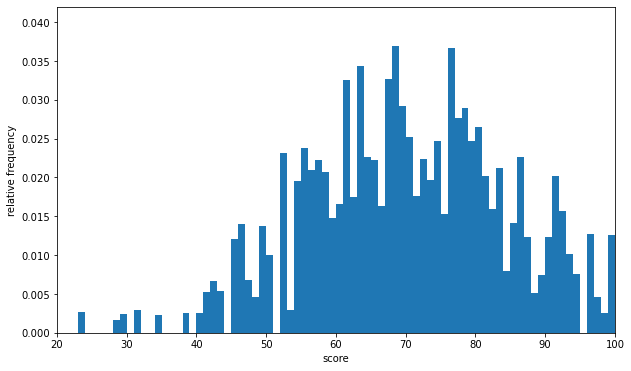

In [155]:
sample = np.random.choice(scores, 10000) # 표본이 커서 실제랑 비슷함


fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0,100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

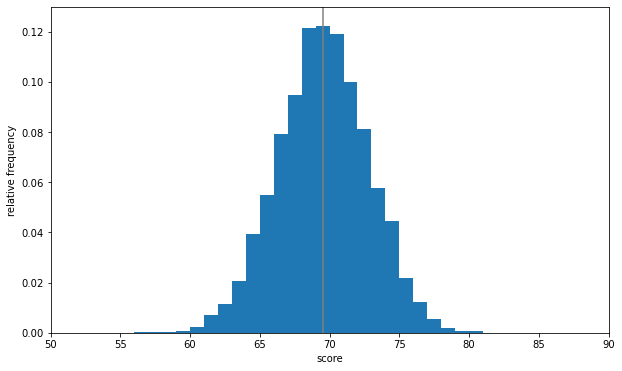

In [157]:
sample_means = [np.random.choice(scores, 20).mean() for _ in range(10000)]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0,100), density=True)
ax.vlines(np.mean(scores), 0, 1, 'gray')
ax.set_xlim(50, 90)
ax.set_ylim(0, 0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

#### 과제2 0824
적절한 데이터를 생성하고 polyfit을 이용하여 2,3차 방정식을 만든 후 산점도, 회귀식을 시각화하여 그 의미를 해석하세요

In [173]:
# 데이터 만들기
import random
en_scores = np.random.randn(100)*10 + 60
ma_scores = np.random.randn(100)*15 + 50 
for i in range(100):
    x = round(random.uniform(0.9, 1.1),2)
    y = np.random.randint(1,10)
    ma_scores[i] = en_scores[i]*x + y

In [176]:
x=ma_scores
y=en_scores

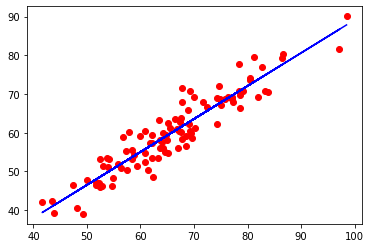

In [177]:
poly = np.polyfit(x,y,1)
y_pred = np.array(x)*poly[0] + poly[1]

plt.plot(x, y_pred, color='b')
plt.scatter(x,y, color="r")
plt.show()

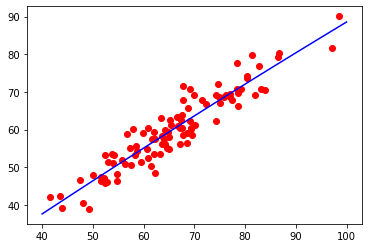

In [182]:
poly = np.polyfit(x,y,2)
x_line = np.linspace(40,100,100) # 곡선을 부드럽게 그리기 위한 linspace 객체 선언 1~6을 100개로
y_pred = (x_line**2)*poly[0] + x_line*poly[1] + poly[2]

plt.plot(x_line, y_pred, color='b')
plt.scatter(x,y, color="r")
plt.show()

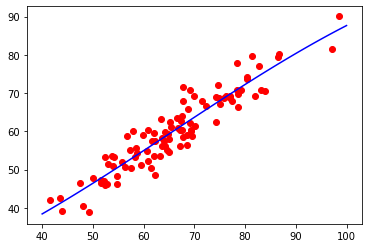

In [189]:
# 5차 
# 차수가 높아지면 과적합 됨
# 일반화가 중요한데 특정 훈련데이터에 과적합될 확률 높음
poly = np.polyfit(x,y,3)
x_line = np.linspace(40,100,100)
y_pred = np.zeros_like(x_line) # 예측값을 담을 그릇(현재 모든 값이 0)

for i in range(4):
    y_pred += x_line**(3-i)*poly[i]
plt.plot(x_line, y_pred, color='b')
plt.scatter(x,y,color='r')
plt.show()

#### 과제3 0824
어떤 모집단에서 표본을 랜덤하게 추출하여 표본평균을 구하면 그 표본평균은 모평균을 중심으로 분포한다.

라는 주장을 사례로 만들어서 설득력있게 설명하세요

In [197]:
ma_scores.mean() # 모평균 

65.91372949489549

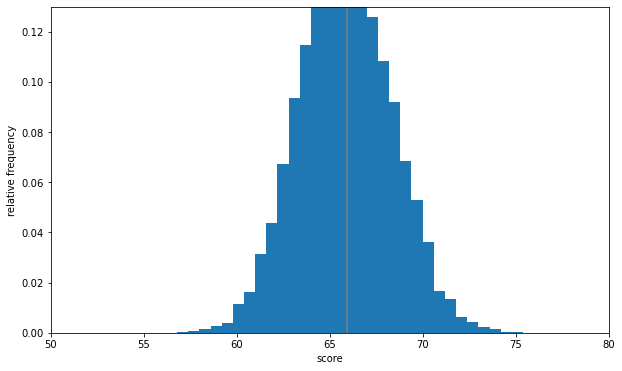

In [196]:

sample_means = [np.random.choice(x, 20).mean() for _ in range(10000)]# 표본 1000개

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(40,100), density=True) # 표본 평균
ax.vlines(np.mean(ma_scores), 0, 1, 'gray')
ax.set_xlim(50, 80)
ax.set_ylim(0, 0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

In [ ]:
~p142

#### 과제1 0825
책 p114~ p142

##### 이산형 확률변수

In [9]:
#1차원
import numpy as np
import matplotlib.pyplot as plt

%precision 3

'%.3f'

In [10]:
x_set = np.array([1,2,3,4,5,6])
def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0

In [11]:
X = [x_set, f]
prob = np.array([f(x_k) for x_k in x_set])
print(prob,'\n')
dict(zip(x_set, prob))  # 이거 유용해요

[0.048 0.095 0.143 0.19  0.238 0.286] 



{1: 0.048, 2: 0.095, 3: 0.143, 4: 0.190, 5: 0.238, 6: 0.286}

In [1]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'Bar Graph')

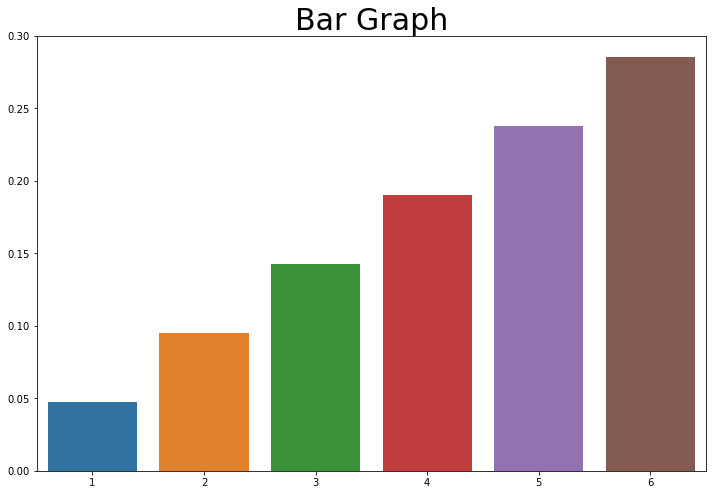

In [13]:
plt.figure(figsize=(12,8))
sns.barplot(x_set,prob)
plt.title('Bar Graph', fontsize=30)

In [14]:
np.all(prob>=0)

True

In [15]:
np.sum(prob)

1.000

In [16]:
# 누적분포함수
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

In [17]:
F(6)

1.000

In [18]:
# 확률변수의 변환 : 확률변수 x에 2를 곱하고 3을 더한 2x +3도 확률변수가 된다.
y_set = np.array([2*x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set, prob))

{5: 0.048, 7: 0.095, 9: 0.143, 11: 0.190, 13: 0.238, 15: 0.286}

In [19]:
# 1차원 이산형 확률변수의 지표
np.sum([x_k*f(x_k) for x_k in x_set])

4.333

In [36]:
s1 = np.random.choice(x_set, int(10))
print(s1)
np.mean(s1)

[1 6 6 1 5 6 4 2 2 4]


3.700

In [37]:
s2 = np.random.choice(x_set, int(10),p=prob)
print(s2)
np.mean(s2)

[3 5 6 5 5 5 6 6 5 6]


5.200

In [31]:
# 확률변수의 기댓값은 확률변수를 무제한 시행하여 얻은 실험값의 평균
sample = np.random.choice(x_set, int(1e6), p=prob) #1e6 = 100만
np.mean(sample)

4.333

In [43]:
def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k)*f(x_k) for x_k in x_set])

In [44]:
E(X)

4.333

In [45]:
E(X, g=lambda x: 2*x+3)

11.667

In [47]:
# 기댓값의 선형성
2* E(X) +3

11.667

In [49]:
# 분산
mean = E(X)
np.sum([(x_k- mean)**2*f(x_k) for x_k in x_set])

2.222

In [60]:
def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)- mean)**2*f(x_k) for x_k in x_set])

In [61]:
V(X)

2.222

In [64]:
V(X, lambda x:2*x +3)

8.889

In [65]:
2**2*V(X)

8.889

In [17]:
#2차원

In [66]:
x_set = np.arange(2,13)
y_set = np.arange(1,7)

In [67]:
def f_XY(x,y):
    if 1 <= y <= 6 and 1<= x-y <= 6:
        return y* (x-y) / 441
    else:
        return 0

In [68]:
XY = [x_set,y_set, f_XY]

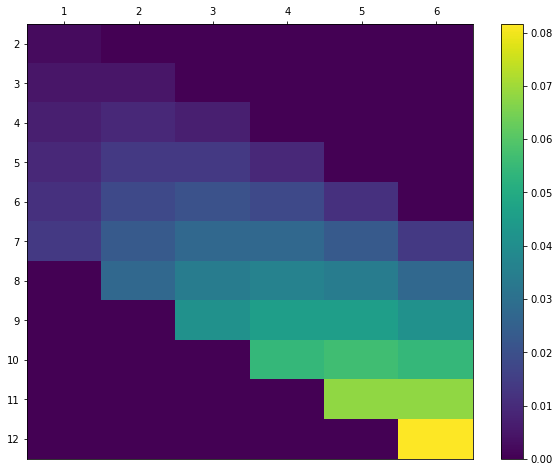

In [69]:
prob = np.array([[f_XY(x_i,y_j) for y_j in y_set] for x_i in x_set])

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1,7), minor=False)
ax.set_yticklabels(np.arange(2,13), minor=False)
ax.invert_yaxis() # y축 내림차순 
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [70]:
np.all(prob>=0)

True

In [71]:
np.sum(prob)

1.000

In [74]:
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])
def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])
X = [x_set, f_X]
Y = [y_set, f_Y]

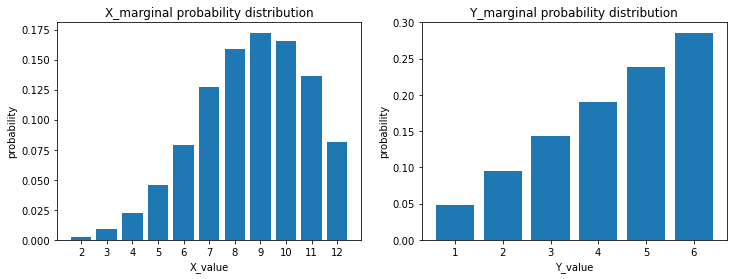

In [76]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')

plt.show()

In [77]:
np.sum([x_i * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

8.667

In [83]:
def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

In [88]:
mean_X = E(XY, lambda x, y: x)
mean_X

8.667

In [86]:
mean_Y = E(XY, lambda x,y: y)
mean_Y

4.333

In [89]:
#선형성
a,b=2,3
E(XY, lambda x,y: a*x +b*y)

30.333

In [90]:
a * mean_X + b * mean_Y

30.333

In [91]:
#분산
np.sum([(x_i-mean_X)**2 * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

4.444

In [92]:
# 분산
def V(XY, g):
    x_set, y_set, f_XY = XY
    mean = E(XY, g)
    return np.sum([(g(x_i, y_j)-mean)**2 * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

In [93]:
var_X = V(XY, g=lambda x, y: x)
var_X

4.444

In [95]:
var_Y=V(XY,g=lambda x, y: y)
var_Y

2.222

In [96]:
#공분산
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y:x)
    mean_Y = E(XY, lambda x, y:y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

In [97]:
cov_xy = Cov(XY)
cov_xy

2.222

In [98]:
V(XY, lambda x, y:a*x + b*y)

64.444

In [100]:
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_xy

64.444

In [101]:
cov_xy / np.sqrt(var_X * var_Y) #cov 공분산 /  (분산들의 곱의 제곱근 = 분산)

0.707

#### 과제2 0825
1차원 이산형 확률변수의 변환 사례를 생성하여 기댓값의 선형성과 분산공식을 입증하세요

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
x_set = np.array([1,2,3,4,5,6])
def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0

In [8]:
X = [x_set, f]
prob = np.array([f(x_k) for x_k in x_set])
print(prob,'\n')
dict(zip(x_set, prob))

[0.04761905 0.0952381  0.14285714 0.19047619 0.23809524 0.28571429] 



{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

C:\Users\SANGYUN\anaconda3\envs\cakd7\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Bar Graph')

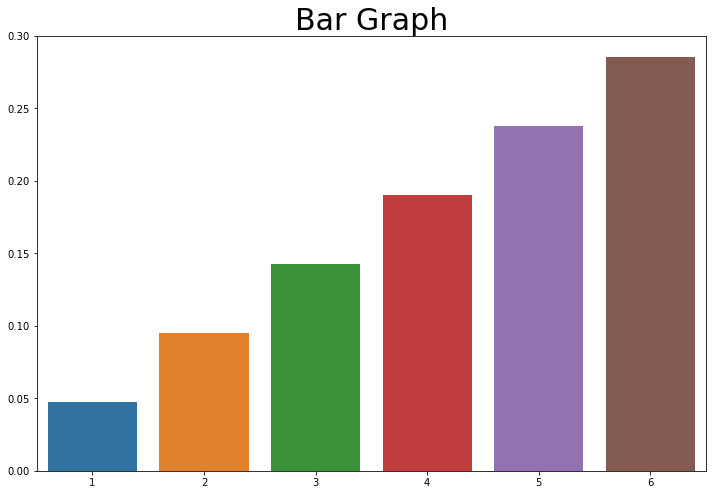

In [9]:
plt.figure(figsize=(12,8))
sns.barplot(x_set,prob)
plt.title('Bar Graph', fontsize=30)

In [10]:
#선형성
y_set = np.array([2*x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set, prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

In [11]:
def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k)*f(x_k) for x_k in x_set])

In [12]:
E(X, g=lambda x: 2*x+3)

11.666666666666664

In [13]:
# 기댓값의 선형성
2* E(X) +3

11.666666666666666

In [14]:
# 분산
mean = E(X)
np.sum([(x_k- mean)**2*f(x_k) for x_k in x_set])

2.2222222222222223

In [15]:
def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)- mean)**2*f(x_k) for x_k in x_set])

In [16]:
V(X, lambda x:2*x +3)

8.88888888888889

In [17]:
2**2*V(X)

8.88888888888889

#### 과제3 0825
2차원 이산형 확률변수의 변환사례를 생성하여 기댓값의 선형성, 분산과 공분산의 공식을 입증하세요.

In [28]:
x_set = np.arange(2,13)
y_set = np.arange(1,7)

In [29]:
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])
def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])
X = [x_set, f_X]
Y = [y_set, f_Y]

In [30]:
def f_XY(x,y):
    if 1 <= y <= 6 and 1<= x-y <= 6:
        return y* (x-y) / 441
    else:
        return 0

In [31]:
XY = [x_set,y_set, f_XY]

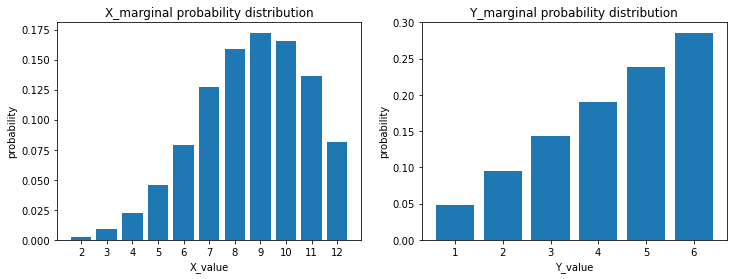

In [32]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')

plt.show()

In [33]:
def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

In [34]:
mean_X = E(XY, lambda x, y: x)
mean_X

8.666666666666666

In [35]:
mean_Y = E(XY, lambda x,y: y)
mean_Y

4.333333333333333

In [36]:
a,b=2,3
E(XY, lambda x,y: a*x +b*y)

30.333333333333332

In [37]:
np.sum([(x_i-mean_X)**2 * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

4.444444444444444

In [38]:
# 분산
def V(XY, g):
    x_set, y_set, f_XY = XY
    mean = E(XY, g)
    return np.sum([(g(x_i, y_j)-mean)**2 * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

In [40]:
var_X = V(XY, g=lambda x, y: x)
var_X

4.444444444444444

# 대표적인 이산형 확률분포

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%precision 3

'%.3f'

In [2]:
linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

def check_prob(X): # 확률변수를 인수로 가지며 기댓값과 분산 계산 결과를 반환
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), 'minus probability' # 조건을 확신한다? 라는 뜻으로 체크할때 씀 ### 가정설정문 조건을 벗어나면 AssertionError뜸!!!
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    print(f'expected value {E(X):.4}')
    print(f'variance {(V(X)):.4}')
    
def plot_prob(X): # 확률변수를 인수로 가지며 그 확률변수의 확률함수와 기댓값을 그리기 위한 함수
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    
    plt.show()


In [3]:
print(f'{4.0000:.4}')

4.0


#### 과제1 0826
p150~p152

## 베르누이 분포
- 가장 기본적인 이산형 확률분포로 확률변수가 취할 수 있는 값이 0과 1밖에 없는 분포이다.
- 베르누이 분포를 따르는 확률변수의 시행을 베르누이 시행이라하며 1이 나오면 성공 0이 나오면 실패라고 함
- 동전을 던져 앞면이 나올 확률, 주사위를 한 번 굴려 6이 나오지 않을 확률


In [4]:
def Bern(p):
    x_set = np.array([0,1])
    def f(x):
        if x in x_set:
            return p**x*(1-p)**(1-x)
        else:
            return 0
    return x_set, f

In [5]:
p = 0.3
X=Bern(p)

In [6]:
check_prob(X) # 위에 만들어놓은 기댓값, 분산

expected value 0.3
variance 0.21


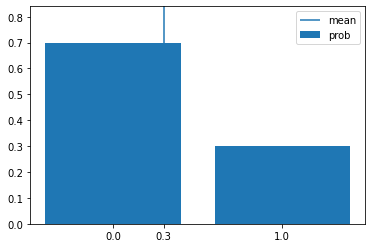

In [7]:
plot_prob(X)

In [8]:
rv = stats.bernoulli(p)
rv.pmf(0), rv.pmf(1), rv.cdf([0,1]), rv.mean(), rv.var()

(0.700, 0.300, array([0.7, 1. ]), 0.300, 0.210)

#### 과제2 0826
p156~p158

## 이항분포
성공 확률이 p인 베르누이 시행을 n번 했을 때의 성공 횟수가 따르는 분포  
f(x) = $_{n}\mathrm{C}_{x}p^x(1-p)^{n-x}$ $(x \in \{0,1,..,n\}$)
       
       0                     (otherwise)


In [9]:
from scipy.special import comb

def Bin(n, p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n, x) * p**x * (1-p)**(n-x)
        else:
            return 0
    return x_set, f

In [10]:
#동전을 10번 던져 앞면이 3번 나오는 확률의 이항분포
n = 10
p = 0.3
X = Bin(n,p)

In [11]:
check_prob(X)

expected value 3.0
variance 2.1


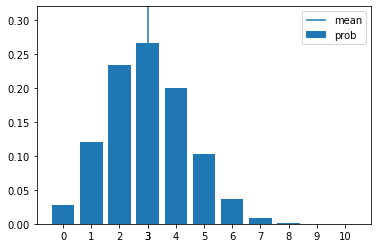

In [12]:
plot_prob(X)

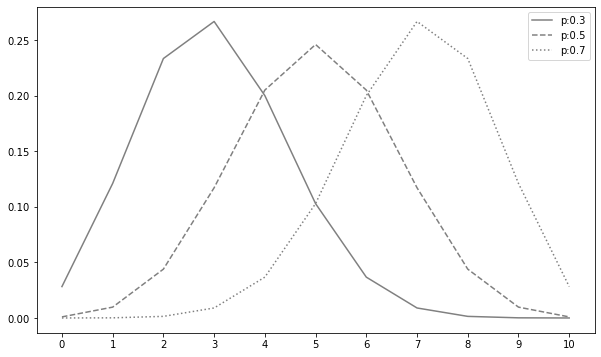

In [13]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(n+1)
for p, ls in zip([0.3, 0.5, 0.7], linestyles):
    rv = stats.binom(n,p)
    ax.plot(x_set, rv.pmf(x_set),
           label=f'p:{p}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

#### 과제3 0826
p ~p

## 기하분포
- 베르누이 시행에서 처음 성공할 때까지 반복한 시행 횟수가 따르는 분포
- 기하분포의 파라미터는 베르누이 시행의 성공 확률 파라미터 p가 되며 파라미터 p의 기하분포를 Ge(p)로 표기  

f(x) = $(1-p)^{x-1}p$ $(x \in \{0,1,2,3,..\})$

       0              (otherwise) 
       
- 기하분포의 기댓값과 분산 : E(X) = 1/p, V(X) = (1-p)/$p^2$


In [14]:
def Ge(p):
    x_set = np.arange(1, 30)
    def f(x):
        if x in x_set:
            return p * (1-p) ** (x-1)
        else:
            return 0
    return x_set, f

In [15]:
p = 0.5
X = Ge(p)

In [16]:
check_prob(X)

expected value 2.0
variance 2.0


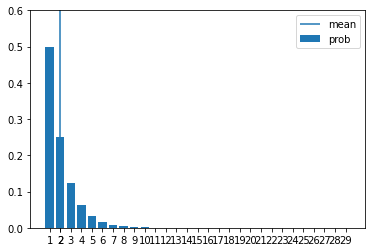

In [17]:
plot_prob(X)

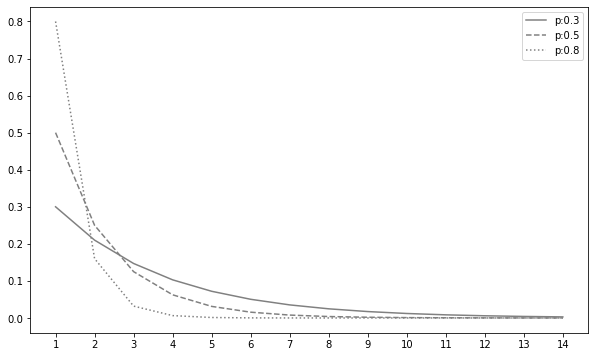

In [18]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(1, 15)
for p, ls in zip([0.3, 0.5, 0.8], linestyles):
    rv = stats.geom(p)
    ax.plot(x_set, rv.pmf(x_set),
           label=f'p:{p}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

#### 과제4 0826
p167~p169

## 포아송 분포
- 임의의 사건이 단위 시간당 발생하는 건수가 따르는 확률분포이며 포아송 분포의 파라미터는 $\lambda$로 나타낸다.
- 하루에 평균 2건의 교통사고가 발생하는 지역에서 하루 교통사고 발생 건수는 Poi(2)를 따른다.  
P(X=0) = 2!/0! * $e^{-2}$ = 0.135

- 포아송 분포의 기댓값과 분산을 모두 $\lambda$ 가 된다.

f(x) = $\lambda^x/x!*e^{-\lambda}$ $(x \in \{0,1,2,...\})$

       0               (otherwise)


In [19]:
from scipy.special import factorial

def Poi(lam):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam, x) / factorial(x) * np.exp(-lam)
        else:
            return 0
    return x_set, f

In [20]:
lam = 3
X = Poi(lam)

In [21]:
check_prob(X)

expected value 3.0
variance 3.0


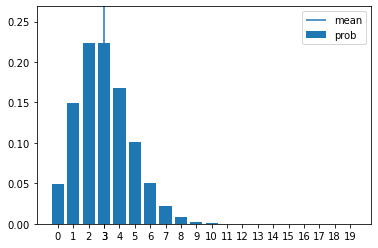

In [22]:
plot_prob(X)

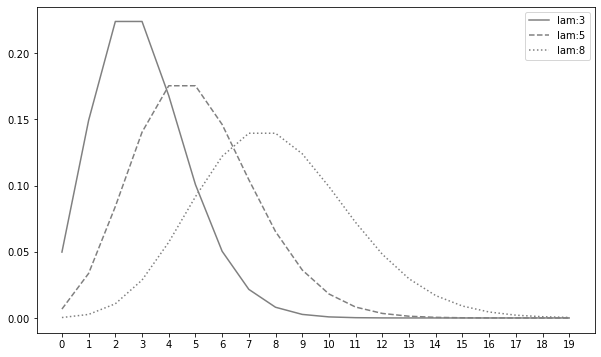

In [23]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(20)
for lam, ls in zip([3, 5, 8], linestyles):
    rv = stats.poisson(lam)
    ax.plot(x_set, rv.pmf(x_set),
           label=f'lam:{lam}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

#### 과제5 0826
베르누이분포, 이항분포, 기하분포, 포아송분포의 사례를 만들어서 각각의 경우에 대한 기대값과 분산을 산출하세요.

In [24]:
베르누이: 가장 기본적인 확률 분포 ex)동전 앞면이 나올 확률 = p
이항분포: 베르누이에서 p의 확률을 n번 했을 때 성공 횟수의 분포 ex)동전을 10번 던져서 앞면이(=k번) 나올 확률 의 분포
기하분포: 베르누이에서 p의 확률을 처음 성공했을 때 까지 반복한 시행 횟수가 따르는 분포 ex)동전의 앞면이 나올 때 까지 던진 횟수가 따르는 분포 1 => 1/2 2=>1/4 ..
포아송분포: 임의의 사건이 단위 시간당 발생하는 건수가 따르는 분포(확률변수: 정수) ex)하루평균 2번 교통사고가 발생하는 지역에서, 하루 교통사고 발생 건수가 따르는 분포 

SyntaxError: invalid syntax (1626173853.py, line 1)